<center><h1 style="font-family: Verdana; line-height: 1.8;">CANAM Group AI Challenge</h1></center><br>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">In this notebook, we will address the task of predicting the success or failure of Kickstarter projects. The dataset at our disposal contains valuable information about past campaigns on the Kickstarter platform, including details like project name, category, currency, launch date, funding goal, pledged amount, and more.</p>


***


<h2 style="font-family: Verdana;line-height: 1.8;">Objective 🎯</h2><br>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">The objective is to <b>develop a machine learning model that predicts the outcome of Kickstarter projects as either 'successful' or 'failed' based on historical campaign data</b>. While the dataset includes other states like "ongoing," "canceled," and "suspended," our primary focus will be on distinguishing between successful and failed outcomes. By focusing exclusively on distinguishing between these two states, the aim is to create a binary classification system. The model will assist project promoters in anticipating the likelihood of a campaign's success on the Kickstarter platform. This simplification allows for a clearer predictive model targeted at assisting project promoters in anticipating the success potential of their campaigns.</p>


***


<h2 style="font-family: Verdana; line-height: 1.8;">Approach</h2><br>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">Our approach will involve the following steps:</p>

<ol style="font-family: Verdana;line-height: 1.8; font-size: 13px;">
    <li><b>Data Loading and Exploration:</b></li>
    <ul>
        <li>Load the provided dataset (`ks_dataset.csv`).</li>
        <li>Explore the structure and contents of the dataset.</li>    
    </ul><br>
    <li><b>Data Preprocessing:</b></li>
    <ul>
        <li>Handle missing values.</li>
        <li>Ensure the data is consistent</li>
    </ul><br>
    <li><b>Data Exploration and Visualization:</b></li>
    <ul>
        <li>Understand the distribution of the target variable.</li>
        <li>Explore relationships between features and the target.</li>
    </ul><br>
    <li><b>Feature Engineering:</b></li>
    <ul>
        <li>Create new features if necessary.</li>
        <li>Transform existing features to improve relevance.</li>
    </ul><br>
    <li><b>Model Selection and Training:</b></li>
    <ul>
        <li>Choose a suitable machine learning algorithm for classification.</li>
        <li>Train the model on the preprocessed data.</li>
    </ul><br>
    <li><b>Model Evaluation:</b></li>
    <ul>
        <li>Evaluate the models performance using appropriate metrics.</li>
    </ul><br>
    <li><b>Optimization and Fine-Tuning:</b></li>
    <ul>
        <li>If needed, Fine-tune hyperparameters for better performance.</li>
    </ul><br>
    <li><b>Results Interpretation:</b></li>
    <ul>
        <li>Interpret the model results and provide insights for project promoters.</li>
    </ul><br>
</ol>   
   
***
   
<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">We will be answering the <b>Study Case Questions</b> at the end of the Notebook.</p>

***

<h3 style="font-family: Verdana;line-height: 1.8;">Project structure</h3><br>

📂 CANAM CHALLENGE <br>
  | <br>
  |---- 📁 Dataset <br>
  |   | <br>
  |   |---- 📄 ks_dataset.csv <br>
  | <br>
  |---- 📄 Notebook.ipynb
  
<br>
<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">In this intuitive representation:</p>

- **CANAM CHALLENGE** is the main project folder.
- Inside it, there's a **Dataset** folder containing the `ks_dataset.csv` file.
- Finally, there's the **Notebook.ipynb**, the Jupyter Notebook.

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">Let's begin our journey of exploring, preparing, and modeling the Kickstarter dataset to help project promoters make informed decisions for their future campaigns.</p>

***

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import seaborn as sns  # For data visualization
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # Encoding categorical variables
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier model
from xgboost import XGBClassifier  # XGBoost classifier model
from scikeras.wrappers import KerasClassifier  # Wrapper for using Keras models with scikit-learn
from keras.models import Sequential  # Sequential model in Keras
from keras.layers import Dense  # For adding dense layers in Keras models
from tensorflow.keras.models import save_model  # For saving Keras/TensorFlow models
from sklearn.model_selection import cross_val_score  # For cross-validation
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance (accuracy and classification report)

***

<h3 style="font-family: Verdana;line-height: 1.8;">1. Data Loading and Exploration</h3>

In [2]:
try:
    # Load the dataset without an encoding
    data = pd.read_csv("Dataset/ks_dataset.csv")
    print("Loaded without encoding")
except UnicodeDecodeError as e:
    # If there's an error load with latin1 encoding, there's an issue with utf-8 encoding
    print(f"Error decoding the CSV file: {e}")
    data = pd.read_csv("Dataset/ks_dataset.csv", encoding='latin1')
    print("File loaded successfully")

Error decoding the CSV file: 'utf-8' codec can't decode byte 0x99 in position 7955: invalid start byte
File loaded successfully


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13592\3762690221.py:8: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Dataset/ks_dataset.csv", encoding='latin1')


<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">Seems as there are mixed types within columns 13, 14 and 15. let's have a look at that.</p>

In [3]:
# Head the dataset
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [4]:
# View data shape
data.shape

(323750, 17)

***

<h3 style="font-family: Verdana;line-height: 1.8;">2. Data Preprocessing</h3>


<a id='data_processing'></a>

In [5]:
#print column names
for i in data.columns:
    print(i)

ID 
name 
category 
main_category 
currency 
deadline 
goal 
launched 
pledged 
state 
backers 
country 
usd pledged 
Unnamed: 13
Unnamed: 14
Unnamed: 15
Unnamed: 16


In [6]:
# Number of columns
len(data.columns)

17

In [7]:
# Display unique values in columns causing the warning
for column in ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']:
    print(f"Unique values in {column}: {data[column].unique()}")

Unique values in Unnamed: 13: [nan '504.94765278' '3984' '525' '0' '3035' '4986.41798748' '590' '23924'
 '12306' '13675' '3.39594898' '4690' '4488.01' '687' '450' '11719'
 '126.9669968' '1495' '20' '14309.36' 'US' '8542' '3363' '950' '1800.5'
 '352' '1320' '18' '2161' '331' '13446.90533288' '2630' '1847.3965377'
 '3711' '103' '8609.6' '312' '11044' '5600.65' '630' '1010' '178'
 '2006.0578219' '3671' '65' '5' '4451' '16' '2000' '566.57479307' '125'
 '9444.43338774' '1' '90' '765' '357.66549924' '1850' '166' '2107' '63'
 '10' '8.5104355' '2920.0614495' '306' '13' '321.629504' '7703' '650'
 '800' '2275.2478569' '8.26779725' '1056' '5940' '45' '7.9006665' '1827'
 '10890.45' '245' '416.29712868' '200' '44.7846084' '6' '797' '6126' '175'
 '12201' '3605.13' '1200' '325' '2632' '6507.05253517' '46' '708.0265863'
 '9430.8' '2308' '310' '2759' '9857.8' 6453.0 6189.0 3186.06238752 6.0 1.0
 860.0 6442.0 0.0 390.0 1.45244126 1595.0 1763.47 119.7938066 11315.5 25.0
 3141.0 20.0 246.798141785 1700.0 

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">There is a typo... From the official data dictionnary, there are 13 columns but i have 4 unnamed columns with no meaningful information so they can be dropped</p>

In [8]:
# Drop unwanted columns
columns_to_drop = ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
data = data.drop(columns=columns_to_drop)

In [9]:
# Head again the dataset
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [10]:
# Count number of missing values
data.isna().sum()

ID                   0
name                 4
category             5
main_category        0
currency             0
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usd pledged       3790
dtype: int64

In [11]:
# Remove rows with missing values
data = data.dropna()

# Again, Count number of missing values
data.isna().sum()

ID                0
name              0
category          0
main_category     0
currency          0
deadline          0
goal              0
launched          0
pledged           0
state             0
backers           0
country           0
usd pledged       0
dtype: int64

In [12]:
# Ensure the dataset data types as the ones on the dictionary
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319951 entries, 0 to 323749
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              319951 non-null  int64 
 1   name            319951 non-null  object
 2   category        319951 non-null  object
 3   main_category   319951 non-null  object
 4   currency        319951 non-null  object
 5   deadline        319951 non-null  object
 6   goal            319951 non-null  object
 7   launched        319951 non-null  object
 8   pledged         319951 non-null  object
 9   state           319951 non-null  object
 10  backers         319951 non-null  object
 11  country         319951 non-null  object
 12  usd pledged     319951 non-null  object
dtypes: int64(1), object(12)
memory usage: 34.2+ MB


In [13]:
# Remove spaces from column names
data.columns = data.columns.str.replace(' ', '')

# Display the modified column names
print(data.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usdpledged'],
      dtype='object')


In [14]:
# Convert data types to match the data dictionary
data['ID'] = data['ID'].astype(str)
data['name'] = data['name'].astype(str)
data['main_category'] = data['main_category'].astype(str)
data['category'] = data['category'].astype(str)
data['currency'] = data['currency'].astype(str)

# Convert deadline and launched columns, handling errors with coerce
data['deadline'] = pd.to_datetime(data['deadline'], errors='coerce')
data['launched'] = pd.to_datetime(data['launched'], errors='coerce')

data['goal'] = pd.to_numeric(data['goal'], errors='coerce')
data['pledged'] = pd.to_numeric(data['pledged'], errors='coerce')
data['state'] = data['state'].astype(str)
data['backers'] = pd.to_numeric(data['backers'], errors='coerce')
data['country'] = data['country'].astype(str)
data['usdpledged'] = pd.to_numeric(data['usdpledged'], errors='coerce')

In [15]:
# Display data types after conversion
print(data.dtypes)

ID                       object
name                     object
category                 object
main_category            object
currency                 object
deadline         datetime64[ns]
goal                    float64
launched         datetime64[ns]
pledged                 float64
state                    object
backers                 float64
country                  object
usdpledged              float64
dtype: object


In [16]:
# Check for inconsistencies in data
for i in data.columns:
    print(i,": ",data[i].unique(),"\n")

ID :  ['1000002330' '1000004038' '1000007540' ... '999986353' '999987933'
 '999988282'] 

name :  ['The Songs of Adelaide & Abullah' 'Where is Hank?'
 'ToshiCapital Rekordz Needs Help to Complete Album' ...
 'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!'
 'BioDefense Education Kit' 'Nou Renmen Ayiti!  We Love Haiti!'] 

category :  ['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Design' 'Comic Books' 'Art Books' 'Fashion' 'Theater'
 'Comics' 'DIY' 'Webseries' 'Food Trucks' 'Public Art' 'Illustration'
 'Photography' 'Pop' 'Tabletop Games' 'Art' 'Family' 'Fiction'
 'Accessories' 'Rock' 'Hardware' 'Weaving' 'Gadgets' 'Web' 'Jazz'
 'Ready-to-wear' 'Festivals' 'Video Games' 'Anthologies' 'Publishing'
 'Shorts' 'Electronic Music' 'Radio & Podcasts' 'Apps' 'Cookbooks'
 'Apparel' 'Metal' 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting'
 'Software' 'Worl

country :  ['GB' 'US' 'CA' 'NO' 'AU' 'IT' 'DE' 'IE' 'ES' 'MX' 'SE' 'FR' 'NL' 'NZ'
 'CH' 'AT' 'BE' 'DK' 'HK' 'LU' '14' '46' '10' '0' '42' 'SG' '35' '780'
 '122' '213' '2' '3' '126' '73' '19' '1' '142' 'failed' '140' '38' '24'
 '60' '37' '29' '167' '45' '23' '4' '85' '9' '248' '111' '18' '13' '28'
 '40' '54' '17' '20' '195' '25' '72' '22' '12' '158' '62' '307' '31' '7'
 '110' '6' '69' '68' '84' '75' '78' '150' '77' '83' '89' '16' '154' '92'
 '11' '116' '56' '136' '58' '27' '26' '582' '43' '5' '41' '30' '177' '36'
 '15' '49' '51' '9854' '168' '8' '57' '283' '61' '33' '74' '157' '405'
 '91' '174' '107' '813' '66' '52' '114' '288' '109' '21' '32' '119' '169'
 '50' '98' '483' '289' '88' '124' '159' '222' '65' '631' '59' '53' '117'
 '197' 'successful' '70' '55' '108' '63' '732' '93' '162'
 '2015-09-10 18:15:45' '39' '34' '284' '170' '238' '246' '2001' '608'
 '144' '99' '71' '229' '338' '81' '176'] 

usdpledged :  [0.00000000e+00 2.20000000e+02 1.00000000e+00 ... 1.73202000e+03
 5.01992088e+03

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">The data is inconsistent especially in the columns Currencies, Countries and State</p>

In [17]:
# Identify actual currencies
actual_currencies = ['GBP', 'USD', 'CAD', 'NOK', 'AUD', 'EUR', 'MXN', 'SEK', 'NZD', 'CHF', 'DKK', 'HKD', 'SGD']

# Create a mask for invalid currencies
invalid_currency_mask = ~data['currency'].isin(actual_currencies)

# Drop rows with invalid currencies
data = data[~invalid_currency_mask]

# Identify actual states 
states = ['failed','canceled','successful','live','suspended']

# Create a mask for invalid states
invalid_states_mask = ~data['state'].isin(states)

# Drop rows with invalid states
data = data[~invalid_states_mask]

print(data['currency'].unique())

['GBP' 'USD' 'CAD' 'NOK' 'AUD' 'EUR' 'MXN' 'SEK' 'NZD' 'CHF' 'DKK' 'HKD'
 'SGD']


In [18]:
# Let's check again for inconsistencies
for i in data.columns:
    print(i,": ",data[i].unique(),"\n")

ID :  ['1000002330' '1000004038' '1000007540' ... '999986353' '999987933'
 '999988282'] 

name :  ['The Songs of Adelaide & Abullah' 'Where is Hank?'
 'ToshiCapital Rekordz Needs Help to Complete Album' ...
 'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!'
 'BioDefense Education Kit' 'Nou Renmen Ayiti!  We Love Haiti!'] 

category :  ['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Design' 'Comic Books' 'Art Books' 'Fashion' 'Theater'
 'Comics' 'DIY' 'Webseries' 'Food Trucks' 'Public Art' 'Illustration'
 'Photography' 'Pop' 'Tabletop Games' 'Art' 'Family' 'Fiction'
 'Accessories' 'Rock' 'Hardware' 'Weaving' 'Gadgets' 'Web' 'Jazz'
 'Ready-to-wear' 'Festivals' 'Video Games' 'Anthologies' 'Publishing'
 'Shorts' 'Electronic Music' 'Radio & Podcasts' 'Apps' 'Cookbooks'
 'Apparel' 'Metal' 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting'
 'Software' 'Worl

In [19]:
# Data Shape
data.shape

(319324, 13)

In [20]:
# Filter the DataFrame to include only 'successful' and 'failed' states
data = data[data['state'].isin(['successful', 'failed'])]

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">Let's go ahead and save the data for later usage</p>

In [21]:
# Select the numerical columns
numerical_columns = ['goal', 'pledged', 'backers']

# Print stats for these columns
for i in numerical_columns:
    print(i," : ",data[i].describe(),"\n")

goal  :  count    2.810890e+05
mean     4.184803e+04
std      1.044811e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64 

pledged  :  count    2.810890e+05
mean     9.452609e+03
std      9.415736e+04
min      0.000000e+00
25%      5.000000e+01
50%      7.730000e+02
75%      4.452120e+03
max      2.033899e+07
Name: pledged, dtype: float64 

backers  :  count    281089.000000
mean        112.068943
std         997.597468
min           0.000000
25%           2.000000
50%          15.000000
75%          62.000000
max      219382.000000
Name: backers, dtype: float64 



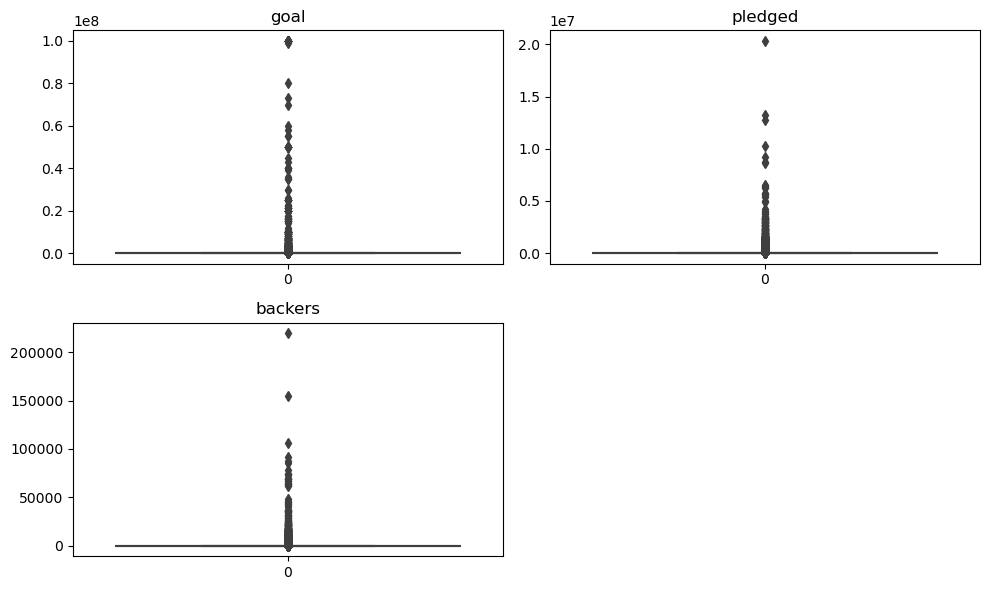

Skewness for each numerical column:
goal       78.323823
pledged    84.852005
backers    85.950731
dtype: float64


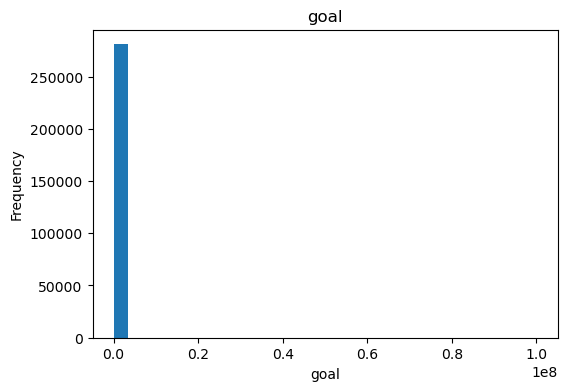

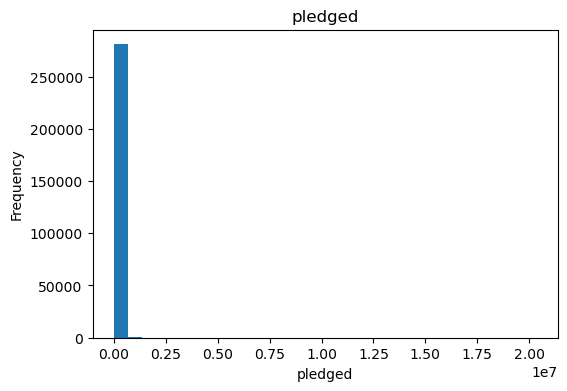

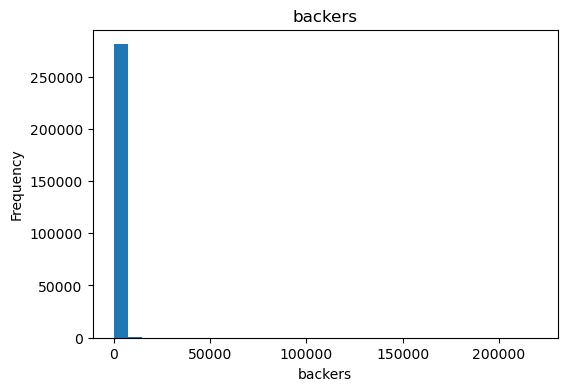

In [22]:
# Plot boxplots for each numerical column to visualize outliers
plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Check skewness for each numerical column
skewness = data[numerical_columns].skew()
print("Skewness for each numerical column:")
print(skewness)

# Histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[column], bins=30)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [23]:
# Function to remove outliers 
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
data_without_outliers = remove_outliers(data, numerical_columns)

In [24]:
# Let's create a new feature: Campaign Duration
data['duration'] = (data['deadline'] - data['launched']).dt.days

In [25]:
# View data shape
data.shape

(281089, 14)

In [26]:
import joblib

# Save Cleaned data
joblib.dump(data,'Cleaned_data.pkl')

['Cleaned_data.pkl']

***

<h3 style="font-family: Verdana;line-height: 1.8;">3. Data Exploration and Visualization</h3>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">Time to understand the relationships and distributions between variables</p><br>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Success and Failure distribution:</b> Explore how the states are distributed in the data</p>

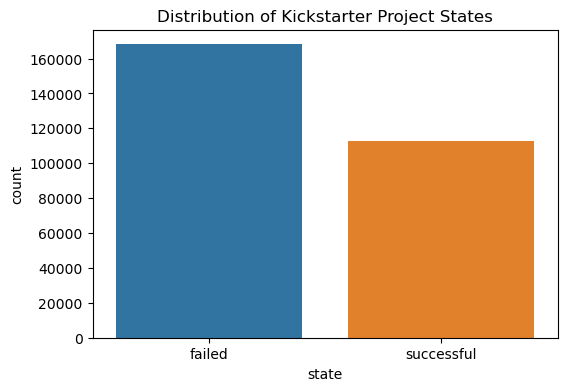

In [27]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='state', data=data)
plt.title('Distribution of Kickstarter Project States')
plt.show()

***

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Main Category and Category crosstabs for exploring success and failure</b></p>

In [28]:
# Cross-tabulation between Project State and Main Category
state_category_crosstab = pd.crosstab(data['state'], data['main_category'])
state_category_crosstab

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
failed,12091,3406,4630,1089,12039,11499,29640,13602,13012,2656,19137,5743,19888,16344,3337
successful,9654,4499,1671,2101,7958,4310,21393,5256,9385,869,21671,2903,10255,5061,5990


In [29]:
# Create a dictionary to hold crosstabs for each main category
crosstabs = {}

# Get unique main categories
main_categories = data['main_category'].unique()

# Iterate over each main category
for main_category in main_categories:
    # Filter data for the specific main category
    subset_data = data[data['main_category'] == main_category]
    
    # Create crosstab for success and failure across categories in the main category
    crosstab_category = pd.crosstab(subset_data['category'], subset_data['state'])
    
    # Store crosstab in the dictionary
    crosstabs[main_category] = crosstab_category

In [30]:
for i in crosstabs.keys():
    print(i,"\n")
    print(crosstabs[i])
    print("\n")

Publishing 

state              failed  successful
category                             
Academic              440         148
Anthologies            96         150
Art Books             941        1097
Calendars             112          97
Children's Books     3264        1867
Fiction              5254        1990
Literary Journals      97          98
Nonfiction           4601        1957
Periodicals           576         460
Poetry                681         423
Publishing           2790        1328
Radio & Podcasts      388         350
Translations           82          33
Young Adult           429         138
Zines                 137         119


Film & Video 

state            failed  successful
category                           
Action              417          77
Animation          1363         597
Comedy              892         645
Documentary        7892        5454
Drama               874         615
Experimental        274         119
Family              186          56


<p style="font-family: Verdana;line-height: 1.8; font-size:13px;">We can see that the The data has more of failed states and very few live, canceled and suspended projects</p>

***

<br><p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Aim:</b> Analyze and compare the success rates of Kickstarter projects across various main categories. Identify which categories tend to have higher or lower success rates, providing insights into potentially promising or challenging categories for launching campaigns.</p>

<Figure size 1000x600 with 0 Axes>

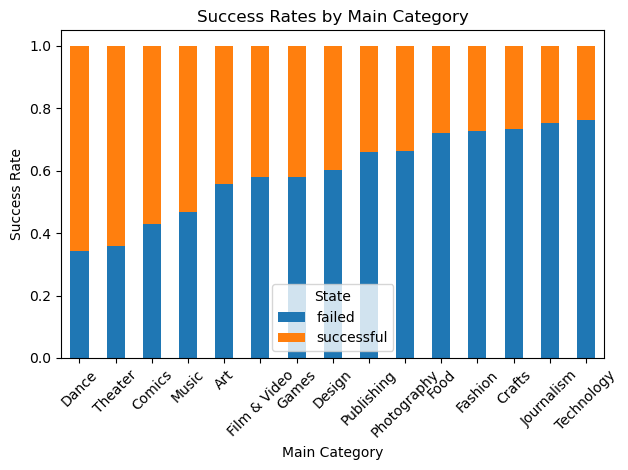

In [32]:
# Success rates by main category
success_rates = data[data['state'].isin(['successful', 'failed'])].groupby('main_category')['state'].value_counts(normalize=True).unstack()
success_rates = success_rates.sort_values(by='successful', ascending=False)

# Plot success ratesby main category
plt.figure(figsize=(10, 6))
success_rates.plot(kind='bar', stacked=True)
plt.title('Success Rates by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Success Rate')
plt.legend(title='State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***

<br><p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Aim:</b> Explore the relationship between the initial funding goals set by projects and the actual amounts pledged, distinguishing between successful and failed projects. Understand if there's a difference in achieved pledges concerning set goals for successful versus failed projects.</p>

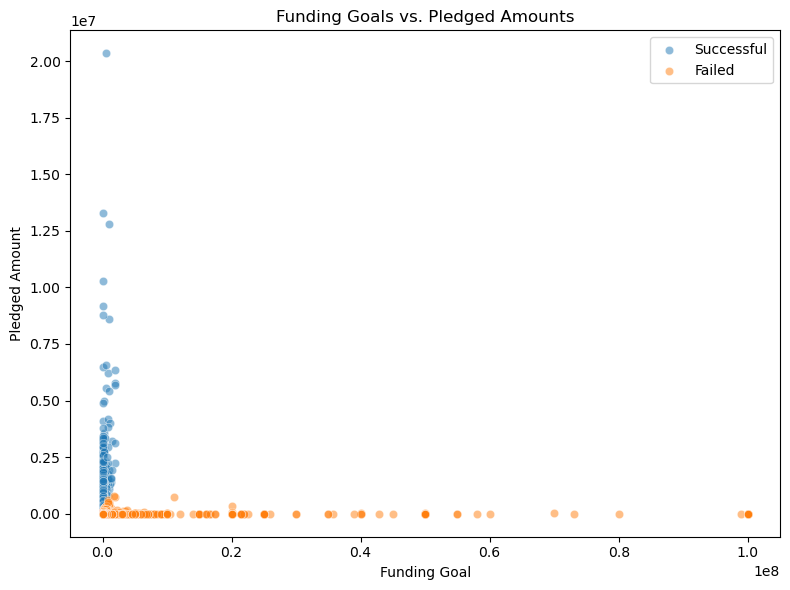

In [33]:
# Let's Filter successful and failed projects
successful_projects = data[data['state'] == 'successful']
failed_projects = data[data['state'] == 'failed']

# Plot funding goals vs. pledged amounts for successful and failed projects
plt.figure(figsize=(8, 6))
sns.scatterplot(data=successful_projects, x='goal', y='pledged', label='Successful', alpha=0.5)
sns.scatterplot(data=failed_projects, x='goal', y='pledged', label='Failed', alpha=0.5)
plt.title('Funding Goals vs. Pledged Amounts')
plt.xlabel('Funding Goal')
plt.ylabel('Pledged Amount')
plt.legend()
plt.tight_layout()
plt.show()

***

<br><p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Aim:</b> Examine the relationship between the number of backers and the output for Kickstarter projects. Understand if there's a correlation between the number of backers and the fact that a campaign is successful or not.</p>

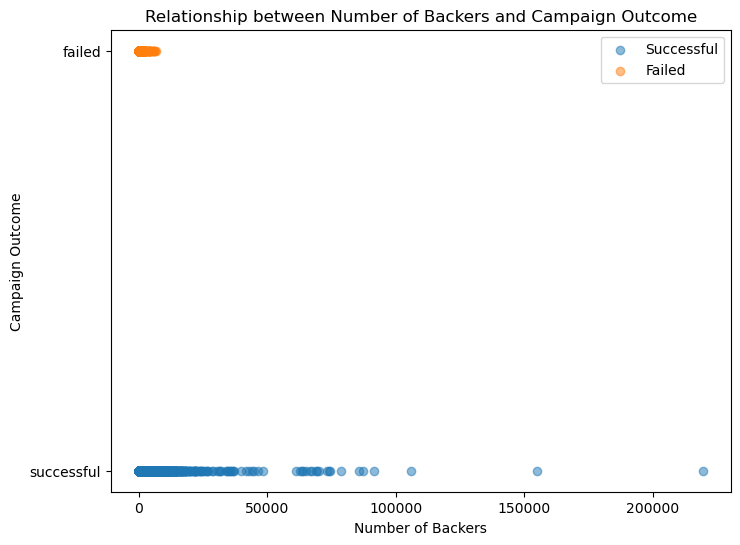

In [34]:
# Assuming you have a DataFrame named 'data' with columns 'backers' and 'state'
plt.figure(figsize=(8, 6))
plt.scatter(data[data['state'] == 'successful']['backers'], data[data['state'] == 'successful']['state'], label='Successful', alpha=0.5)
plt.scatter(data[data['state'] == 'failed']['backers'], data[data['state'] == 'failed']['state'], label='Failed', alpha=0.5)
plt.xlabel('Number of Backers')
plt.ylabel('Campaign Outcome')
plt.legend()
plt.title('Relationship between Number of Backers and Campaign Outcome')
plt.show()

***

<br><p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Aim:</b> Examine the relationship between the number of backers and the amount pledged for Kickstarter projects. Understand if there's a correlation between the number of backers and the overall pledged amounts for successful and failed projects.</p>

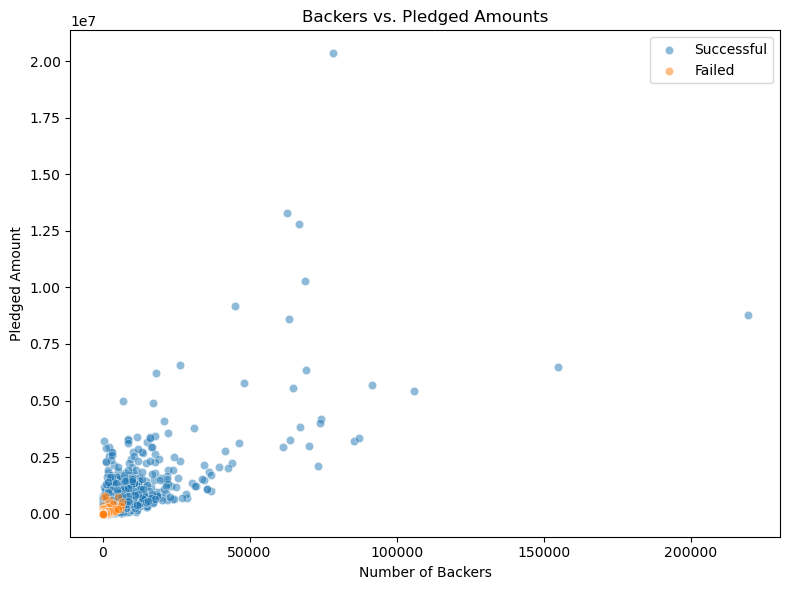

In [35]:
# Scatter plot for Backers vs. Pledged Amount with hue as Project State
plt.figure(figsize=(8, 6))
sns.scatterplot(data=successful_projects, x='backers', y='pledged', label='Successful', alpha=0.5)
sns.scatterplot(data=failed_projects, x='backers', y='pledged', label='Failed', alpha=0.5)
plt.title('Backers vs. Pledged Amounts')
plt.xlabel('Number of Backers')
plt.ylabel('Pledged Amount')
plt.legend()
plt.tight_layout()
plt.show()

***

<br><p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Aim:</b> Investigate whether the duration of Kickstarter campaigns influences their success rates. Explore if projects with shorter or longer durations tend to have higher success rates and how project duration correlates with project success.</p>

<a id='another_cell'></a>

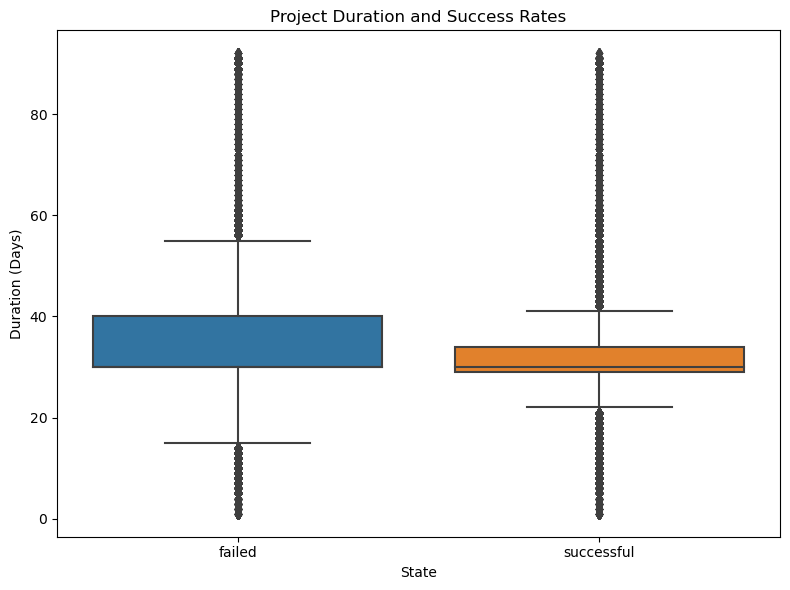

In [36]:
# Plot project duration and success rates
plt.figure(figsize=(8, 6))
sns.boxplot(x='state', y='duration', data=data[data['state'].isin(['successful', 'failed'])])
plt.title('Project Duration and Success Rates')
plt.xlabel('State')
plt.ylabel('Duration (Days)')
plt.tight_layout()
plt.show()

***

<br><p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Aim:</b> Analyze the distribution of campaign durations across different main categories. Understand if specific categories tend to have shorter or longer campaign durations, potentially indicating category-specific optimal campaign durations.</p>

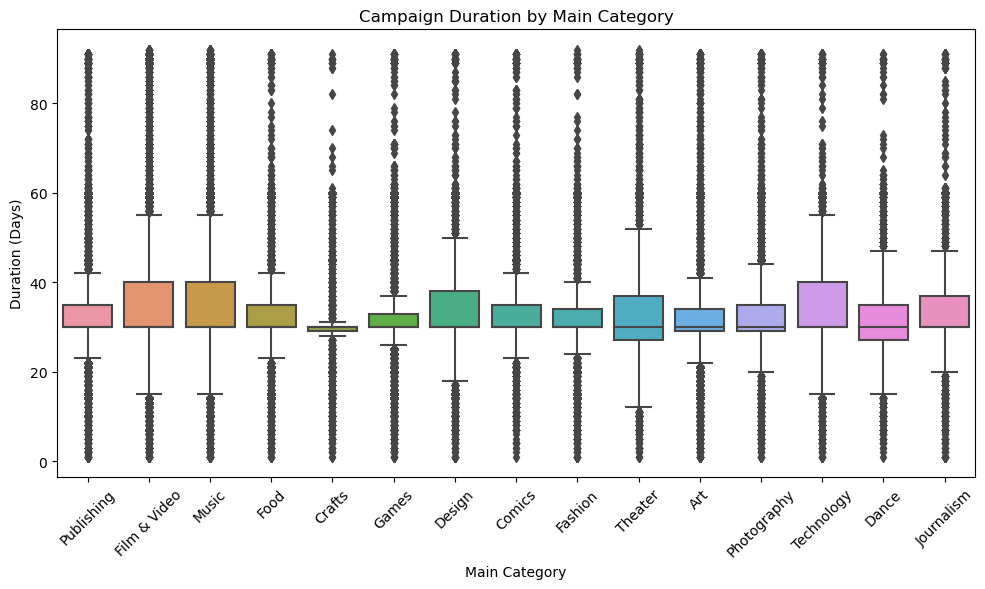

In [37]:
# Campaign Duration by Main Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='main_category', y='duration', data=data)
plt.title('Campaign Duration by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***

<br><p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Aim:</b> Investigate the distribution of funding goals across different currencies and states (successful/failed). Understand if certain currencies or states have higher or lower funding goals and if these factors correlate with project outcomes.</p>

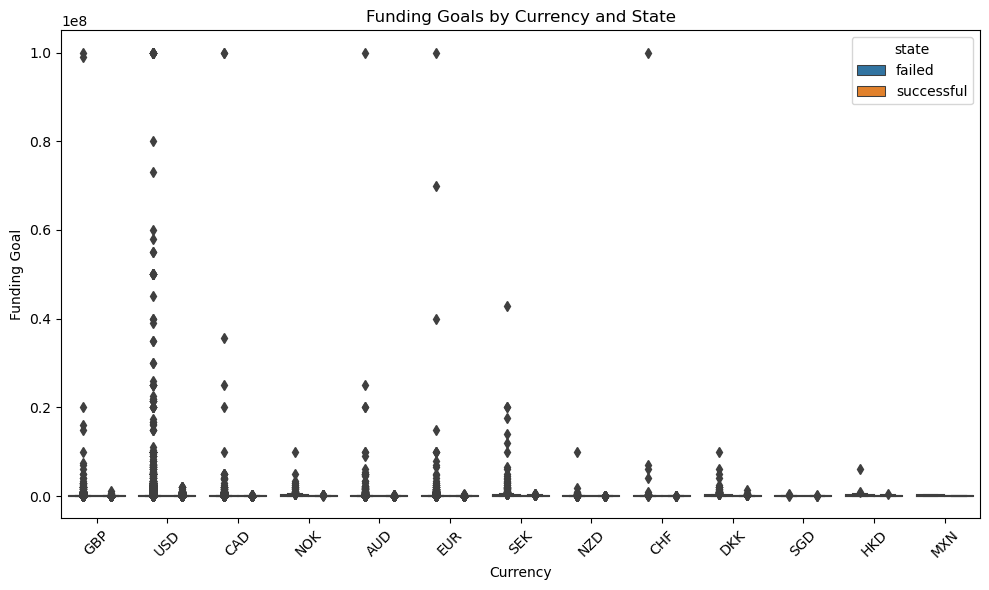

In [38]:
# Funding Goals by Currency and State
plt.figure(figsize=(10, 6))
sns.boxplot(x='currency', y='goal', hue='state', data=data)
plt.title('Funding Goals by Currency and State')
plt.xlabel('Currency')
plt.ylabel('Funding Goal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***

<br><p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Aim:</b> Understand the distributions of projects per country, currency and the success-to-failiure ratio per country and per currency.</p>

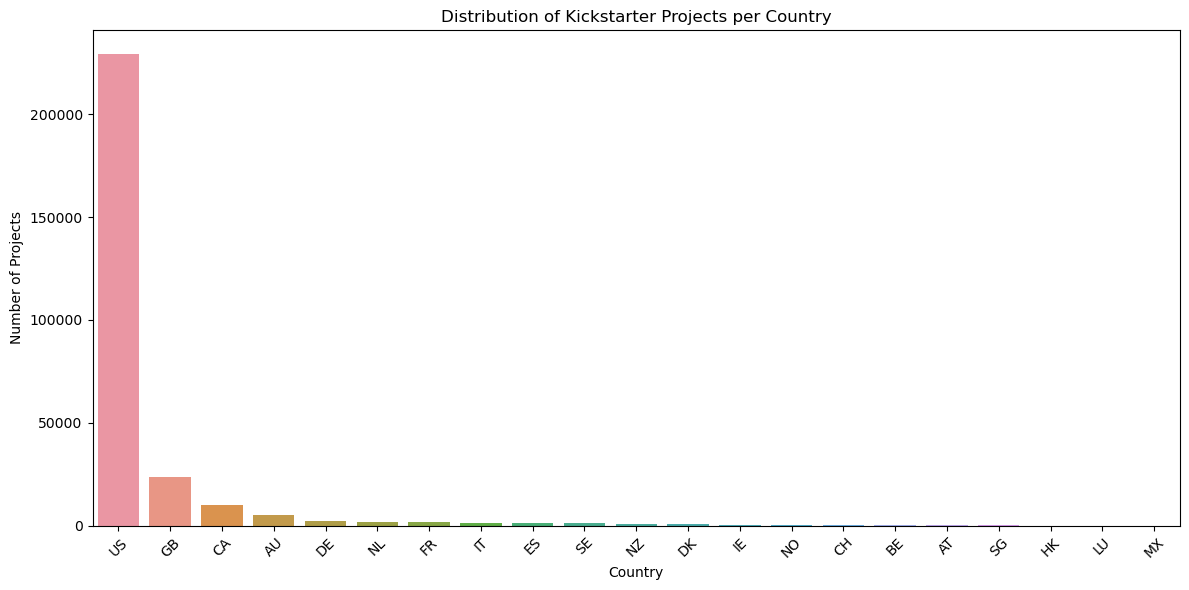

In [39]:
# Distribution of Projects per Country
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=data, order=data['country'].value_counts().index)
plt.title('Distribution of Kickstarter Projects per Country')
plt.xlabel('Country')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

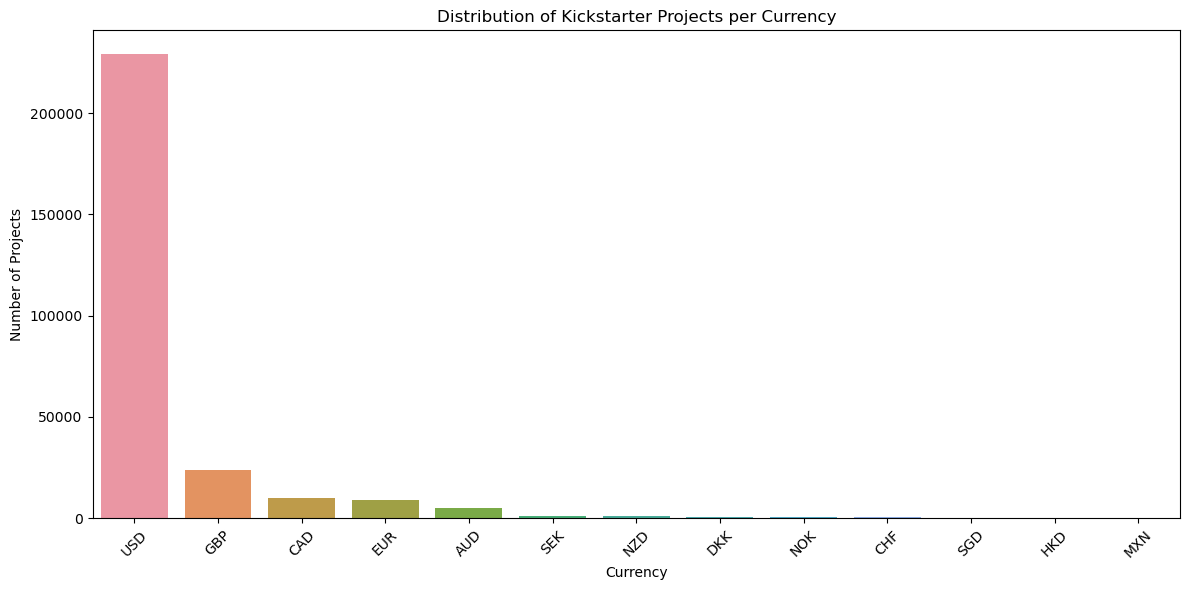

In [40]:
# Distribution of Projects per Currency
plt.figure(figsize=(12, 6))
sns.countplot(x='currency', data=data, order=data['currency'].value_counts().index)
plt.title('Distribution of Kickstarter Projects per Currency')
plt.xlabel('Currency')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

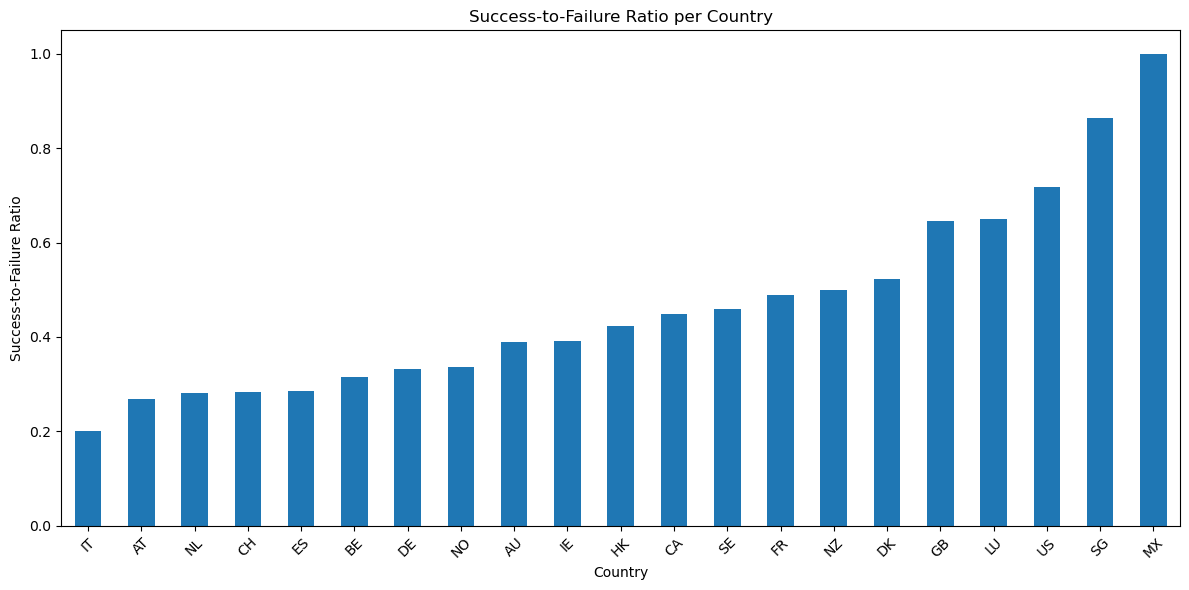

In [41]:
# Success-to-Failure Ratio per Country

# Calculate ratio per country
success_failure_ratio_country = data.groupby(['country', 'state']).size().unstack().fillna(0)
success_failure_ratio_country['Success_Failure_Ratio'] = success_failure_ratio_country['successful'] / success_failure_ratio_country['failed']

# Plot success-to-failure ratio per country
plt.figure(figsize=(12, 6))
success_failure_ratio_country['Success_Failure_Ratio'].sort_values().plot(kind='bar')
plt.title('Success-to-Failure Ratio per Country')
plt.xlabel('Country')
plt.ylabel('Success-to-Failure Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

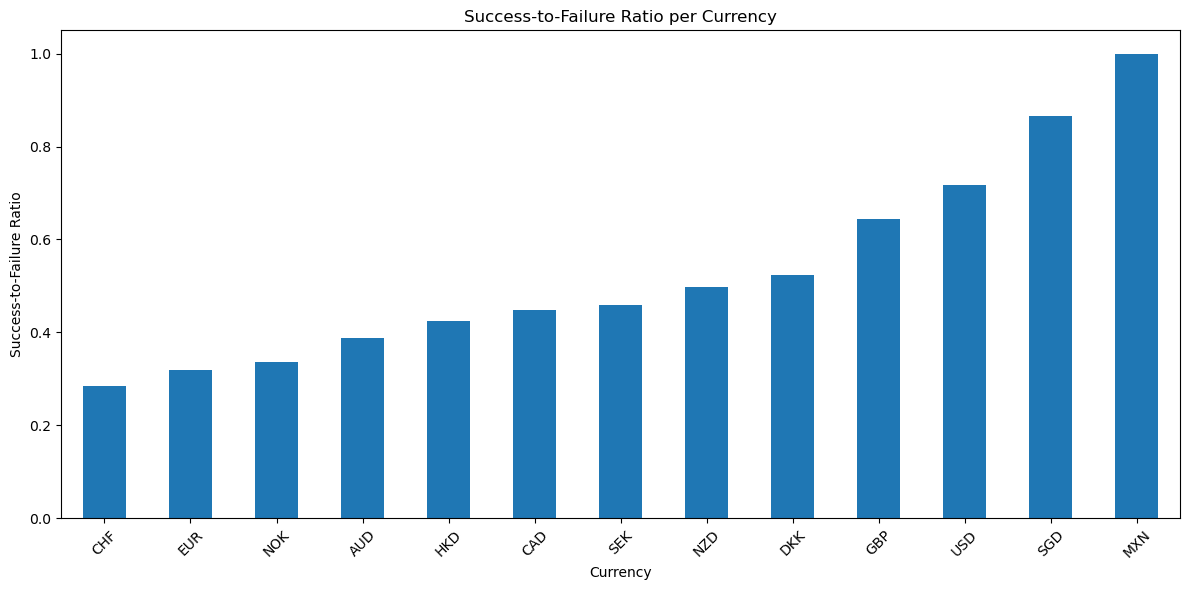

In [42]:
# Calculate success-to-failure ratio per currency
success_failure_ratio_currency = data.groupby(['currency', 'state']).size().unstack().fillna(0)
success_failure_ratio_currency['Success_Failure_Ratio'] = success_failure_ratio_currency['successful'] / success_failure_ratio_currency['failed']

# Plot success-to-failure ratio per currency
plt.figure(figsize=(12, 6))
success_failure_ratio_currency['Success_Failure_Ratio'].sort_values().plot(kind='bar')
plt.title('Success-to-Failure Ratio per Currency')
plt.xlabel('Currency')
plt.ylabel('Success-to-Failure Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***

<br><p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>Aim:</b> Explore the relationships between numerical variables (such as funding goals, pledged amounts, backers, duration, etc.) and the encoded state (0 or 1, representing success or failure). Identify correlations between these numerical features and the project outcome (success or failure) to understand which numerical factors might influence project success or failure</p>

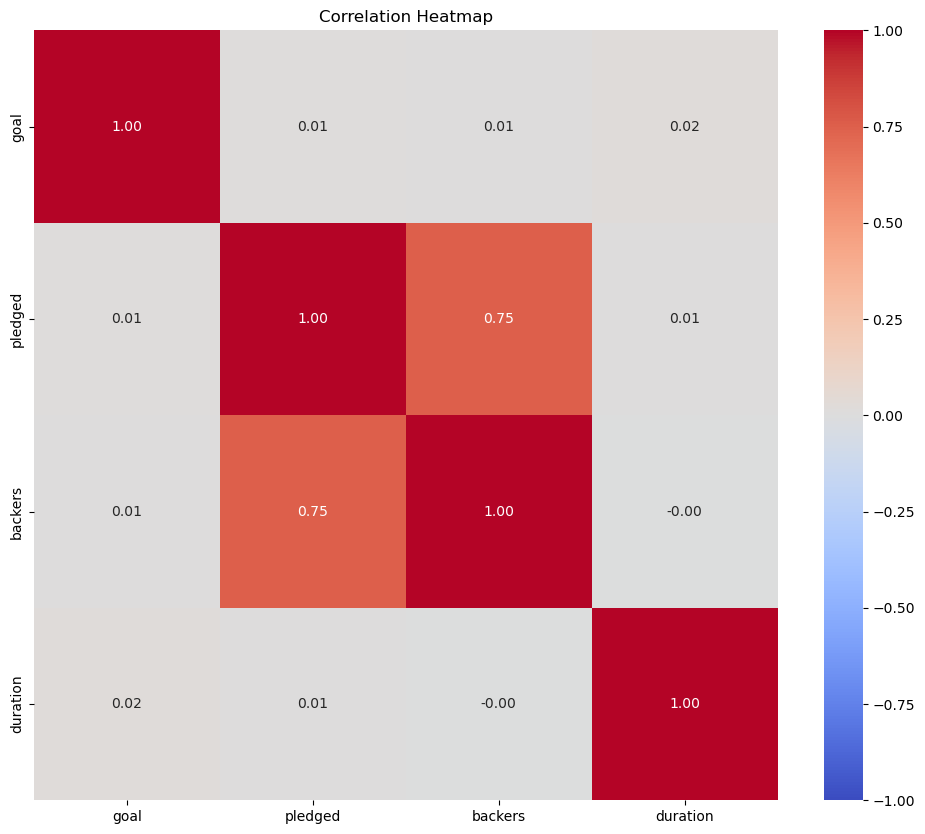

In [43]:
# Select numeric columns for correlation analysis
numeric_columns = ['goal', 'pledged', 'backers', 'duration']

# Create a correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<p style="font-family: Verdana;line-height: 1.8;">We observe a strong correltion between pledged and backers Which might or not lead to multicollinearity</p>

***

<a id='features'></a>

<h3 style="font-family: Verdana;line-height: 1.8;">4. Feature Engineering</h3>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">From the previous analyis,
Hence We can conclude that not all features in the data will help us predict the outcome of kickstarter projects. The most relevant ones are;</p>
<ul style="font-family: Verdana;line-height: 1.8; font-size: 13px;">
    <li>Backers</li>
    <li>Pledged</li>
    <li>Goal</li>
    <li>Duration</li>
</ul>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">Other notable insight include Main Category, Country and Currency.<br><br><b>Note: </b> Features such as category and main_category display the same information so using them together might introduce redundance of information and multicollinearity. The same goes to Backers and Pledged which are both highly correlated.</p>
    
<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">Now we have to put them in formats ( for the ones that aren't yet) that will facilitate the learning of a Machine Learning models.</p><br>

In [44]:
# Check for the number of uniques in main_category, currency and country to determine the best encoding method
for i in ['main_category', 'currency', 'country']:
    print(i,':',len(data[i].unique()))

main_category : 15
currency : 13
country : 21


In [106]:
# Load the saved Cleaned data
data = joblib.load('Cleaned_data.pkl')

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><b>My Choice : </b>One-hot encoding main_category, country, and currency columns ensures model clarity, independence of categories, and compatibility with various algorithms like Random Forest, Neural Networks and XGBoost, addressing high cardinality without information loss or assumption of hierarchy among categories</p><br>

In [107]:
# Create a label encoder for 'state'
label_encoder_state = LabelEncoder()
data['state_encoded'] = label_encoder_state.fit_transform(data['state'])

# Subset columns for one-hot encoding
columns_to_encode = ['main_category', 'country', 'currency']
data_subset = data[columns_to_encode]
# Perform one-hot encoding
one_hot_encoded_df = pd.get_dummies(data_subset)

# Concatenate the encoded columns with the original DataFrame
data = pd.concat([data, one_hot_encoded_df], axis=1)

# Drop the original categorical columns and the columns that will not be used
data.drop(['category', 'main_category', 'country', 'currency', 'ID', 'name', 'deadline', 'launched', 'usdpledged', 'state'], axis=1, inplace=True)


In [126]:
# Encoder (2)
encoder = OneHotEncoder(sparse=False)
# Fit and transform the subset
encoded_data = encoder.fit_transform(data_subset)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [108]:
# Check the encoded data columns
data.columns

Index(['goal', 'pledged', 'backers', 'duration', 'state_encoded',
       'main_category_Art', 'main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ',
       'country_SE', 'country_SG', 'country_US', 'currency_AUD',
       'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR',
       'currency_GBP', 'currency_HKD', 'currency_MXN', 'currency_NOK',
       'currency_NZD', 'curr

In [109]:
# Check for missing values
data.isna().sum()

goal                          0
pledged                       0
backers                       0
duration                      0
state_encoded                 0
main_category_Art             0
main_category_Comics          0
main_category_Crafts          0
main_category_Dance           0
main_category_Design          0
main_category_Fashion         0
main_category_Film & Video    0
main_category_Food            0
main_category_Games           0
main_category_Journalism      0
main_category_Music           0
main_category_Photography     0
main_category_Publishing      0
main_category_Technology      0
main_category_Theater         0
country_AT                    0
country_AU                    0
country_BE                    0
country_CA                    0
country_CH                    0
country_DE                    0
country_DK                    0
country_ES                    0
country_FR                    0
country_GB                    0
country_HK                    0
country_

In [74]:
# Clear missing values
data = data.dropna()

In [75]:
# View our encoded data 
data.head()

,goal,pledged,backers,duration,state_encoded,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,...,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000.0,0.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45000.0,220.0,3.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5000.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50000.0,52375.0,224.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1000.0,1205.0,16.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
# View shape
data.shape

(244038, 54)

In [137]:
# Save encoded data ( Maybe for later usage )
joblib.dump(data,'encoded_data.pkl')

# Save encoder
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [111]:
# Load the saved encoded data
data = joblib.load('encoded_data.pkl')

***

<h3 style="font-family: Verdana;line-height: 1.8;">5. Model Selection and Training</h3>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">I will be training and evaluating 3 Models. We will pick the best at the end</p>
<ul style="font-family: Verdana;line-height: 1.8; font-size: 13px;">
    <li>RandomForest Classifier</li>
    <li>XGboost Classifier</li>
    <li>Neural Network</li>
</ul>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">Let's do a first test to see what will be the impact of using <b>Backers</b> and <b>pledged</b> both as features along with <b>Goal</b>, <b>duration</b>, <b>Main_Category</b>, <b>Category</b>, <b>Country</b>, and <b>Currency</b> for training XGBoost Classifier and retrieve feature importance.</p>

***

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px; font-weight: bold;">Test and Feature Importance</p>

In [112]:
# Test Features
test_features = ['goal', 'pledged', 'backers', 'duration',
       'main_category_Art', 'main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ',
       'country_SE', 'country_SG', 'country_US', 'currency_AUD',
       'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR',
       'currency_GBP', 'currency_HKD', 'currency_MXN', 'currency_NOK',
       'currency_NZD', 'currency_SEK', 'currency_SGD', 'currency_USD']

# Target variable
target = 'state_encoded'

X = data[test_features]
y = data[target]

# Split the data into training and testing sets
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# XGBoost Classifier
test_model = XGBClassifier()
model_name = 'XGBoost Classifier'

In [114]:
# Cross validation score with 5 folds
cv_scores = cross_val_score(test_model, Xt_train, yt_train, cv=5, scoring='accuracy')
print(f"{model_name} Cross-validation Scores on training set: {cv_scores}")
print(f"Mean {model_name} Cross-validation Accuracy on training set: {np.mean(cv_scores)}\n")

# Fit the model on the whole training data
print(f"Training {model_name}...\n")
test_model.fit(Xt_train, yt_train)
print("Done!\n")

XGBoost Classifier Cross-validation Scores on training set: [0.99924402 0.99904389 0.99884378 0.99875484 0.99844355]
Mean XGBoost Classifier Cross-validation Accuracy on training set: 0.9988660148351294

Training XGBoost Classifier...

Done!



In [115]:
# Predict on test set
yt_pred = test_model.predict(Xt_test)
print(f"{model_name} predicted on test set...")

# Print classification report
print(f"Classification Report for {model_name}:")
print(classification_report(yt_test, yt_pred),"\n")

XGBoost Classifier predicted on test set...
Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33580
           1       1.00      1.00      1.00     22638

    accuracy                           1.00     56218
   macro avg       1.00      1.00      1.00     56218
weighted avg       1.00      1.00      1.00     56218
 



In [116]:
# Feature importance
importances = test_model.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = len(test_features) # top 15 features
top_features = Xt_train.columns[indices][:top_n]
top_importances = importances[indices][:top_n]

# Create a dataframe with Features and Importance
top_features_df = pd.DataFrame({'Feature': top_features, 'Importance': top_importances})

print(top_features_df)

                       Feature  Importance
0                      backers    0.753155
1                      pledged    0.113670
2                         goal    0.102774
3          main_category_Music    0.004866
4         main_category_Design    0.004840
5          main_category_Games    0.003018
6     main_category_Technology    0.002796
7   main_category_Film & Video    0.002418
8        main_category_Theater    0.001614
9                   country_CA    0.001169
10          main_category_Food    0.001051
11         main_category_Dance    0.000902
12                  country_SE    0.000872
13                  country_DK    0.000714
14   main_category_Photography    0.000636
15           main_category_Art    0.000621
16                    duration    0.000587
17                  country_DE    0.000568
18                  country_US    0.000554
19       main_category_Fashion    0.000543
20        main_category_Comics    0.000404
21                  country_ES    0.000372
22         

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">The results obtained from the XGBoost classifier using both 'pledged' and 'backers' along with other features seems quite impressive:</p>
<ul style="font-family: Verdana;line-height: 1.8; font-size: 13px;">
    <li>Perfect precision, recall, and f1-score on both classes in the test set.</li>
    <li>A very high mean cross-validation accuracy on the training set.</li>
</ul>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">Given the model's high accuracy and performance, it's tempting to consider keeping both 'pledged' and 'backers' as features. However, there are considerations:</p>

<ol style="font-family: Verdana;line-height: 1.8; font-size: 13px;">
  <li><strong>Multicollinearity:</strong> The correlation between 'pledged' and 'backers' might lead to multicollinearity issues. It can impact the interpretation of individual feature importance and potentially affect model stability.</li>
  <li><strong>Model Simplicity:</strong> Having highly correlated features might make the model more complex and harder to interpret. Simplifying the model often leads to easier understanding and better generalization to new data.</li>
</ol>

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;"><strong>Conclusion :</strong> Since interpretability and accuracy are priorities, We will consider dropping 'pledged' to maintain a cleaner model ad conserve 'backers' which is the most important feature. We will be testing the models performance after dropping 'pledged' to see if the accuracy changes significantly. If not, removing it might be a good option for a simpler and potentially more interpretable model.</p>

***

***
<a id="training"></a>


<p style="font-family: Verdana;line-height: 1.8; font-size: 14px; font-weight: bold;">Training Our Models</p>

In [117]:
# Features
features = ['goal', 'backers', 'duration',
       'main_category_Art', 'main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ',
       'country_SE', 'country_SG', 'country_US', 'currency_AUD',
       'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR',
       'currency_GBP', 'currency_HKD', 'currency_MXN', 'currency_NOK',
       'currency_NZD', 'currency_SEK', 'currency_SGD', 'currency_USD'] # Removed Pledged

# Target variable
target = 'state_encoded'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Check shape
X_train.shape

(224871, 52)

In [138]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Models dictionary
models = {
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'XGBoost': XGBClassifier(),
    'Neural Network': KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)
}

# Iterate over the items and training the models
for name, model in models.items():
    
    # Cross validation score with 5 folds
    print(f"{name} Cross-validation ...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-validation Scores on training set: {cv_scores}")
    print(f"Mean {name} Cross-validation Accuracy on training set: {np.mean(cv_scores)}\n")

    # Fit the model on the whole training data
    print(f"Training {name}...\n")
    model.fit(X_train, y_train)
    print("Done!\n\n")

Random Forest Cross-validation ...
Random Forest Cross-validation Scores on training set: [0.92544747 0.92333348 0.92413394 0.92375595 0.92444524]
Mean Random Forest Cross-validation Accuracy on training set: 0.9242232158692987

Training Random Forest...

Done!


XGBoost Cross-validation ...
XGBoost Cross-validation Scores on training set: [0.93487493 0.93360608 0.93305021 0.93356161 0.93400631]
Mean XGBoost Cross-validation Accuracy on training set: 0.9338198297908546

Training XGBoost...

Done!


Neural Network Cross-validation ...
Neural Network Cross-validation Scores on training set: [0.92251251 0.78540935 0.92131009 0.86759016 0.92453418]
Mean Neural Network Cross-validation Accuracy on training set: 0.8842712566704899

Training Neural Network...

Done!




***

<h3 style="font-family: Verdana;line-height: 1.8;">6. Model Evaluation</h3>

In [140]:
for name, model in models.items():
    # Predict on test set
    y_pred = model.predict(X_test)
    print(f"{name} predicted on test set...")
    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred),"\n") 

Random Forest predicted on test set...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     33580
           1       0.90      0.91      0.91     22638

    accuracy                           0.92     56218
   macro avg       0.92      0.92      0.92     56218
weighted avg       0.92      0.92      0.92     56218
 

XGBoost predicted on test set...
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     33580
           1       0.91      0.93      0.92     22638

    accuracy                           0.93     56218
   macro avg       0.93      0.93      0.93     56218
weighted avg       0.93      0.93      0.93     56218
 

Neural Network predicted on test set...
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     33580
   

<p style="font-family: Verdana;line-height: 1.8; font-size: 13px;">These results are impressive! It seems like removing 'pledged' had a positive impact on the model's generalization while conserving performance. The models are showing good evaluation metrics ( except the Neural Network ), which is great. We will proceed by tuning the models to find the best parameters.</p> 

***

<h3 style="font-family: Verdana;line-height: 1.8;">7. Optimization and Fine tuning</h3>

In [121]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
param_grids = {
    'Random Forest': {'n_estimators': [100, 300, 500]},
    'XGBoost': {'n_estimators': [100, 300, 500], 'learning_rate': [0.1, 0.01, 0.001]},
    'Neural Network': {'epochs': [10, 20, 30], 'batch_size': [32, 64, 128]}
}

# Models after hyperparameter tuning
tuned_models = {}

for name, model in models.items():
    print(f"Tuning {name}...\n")
    
    # Set up GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid=param_grids[name], scoring='accuracy', cv=5, n_jobs=-1)
    
    # Fit the GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Best parameters and best score
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best {name} Cross-validation Accuracy: {grid_search.best_score_}\n")
    
    # Store the best-tuned model
    tuned_models[name] = grid_search.best_estimator_

Tuning Random Forest...

Best Parameters for Random Forest: {'n_estimators': 100}
Best Random Forest Cross-validation Accuracy: 0.9243655213006401

Tuning XGBoost...

Best Parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 100}
Best XGBoost Cross-validation Accuracy: 0.9341266707788156

Tuning Neural Network...



C:\Users\Administrator\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for Neural Network: {'batch_size': 32, 'epochs': 30}
Best Neural Network Cross-validation Accuracy: 0.9256862845070908



***

<h3 style="font-family: Verdana;line-height: 1.8;">8. Evaluation and Result Interpretation</h3><br>

<p style="font-family: Verdana;line-height: 1.8;">Time to evaluate and choose the best fine tuned model</p>

In [122]:
# View the tuned models 
tuned_models

{'Random Forest': RandomForestClassifier(random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'Neural Network': KerasClassifier(
 	model=<function create_model at 0x000002860E524280>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmspr

In [123]:
# Predictions qith fine tuned models
for name, model in tuned_models.items():
    # Predict on test set
    y_pred = model.predict(X_test)
    print(f"Fine tuned {name} predicted on test set...")
    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred),"\n") 

Fine tuned Random Forest predicted on test set...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     33580
           1       0.90      0.91      0.90     22638

    accuracy                           0.92     56218
   macro avg       0.92      0.92      0.92     56218
weighted avg       0.92      0.92      0.92     56218
 

Fine tuned XGBoost predicted on test set...
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     33580
           1       0.91      0.93      0.92     22638

    accuracy                           0.93     56218
   macro avg       0.93      0.93      0.93     56218
weighted avg       0.93      0.93      0.93     56218
 

Fine tuned Neural Network predicted on test set...
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.89 


<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><b>Best Model Selection:</b></p>

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;">After fine-tuning and evaluation on the test set, here are the results:</p>

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;"><b>Random Forest:</b></p>
<ul style="list-style-type: disc;">
    <li>Precision: 0.94 for class 0, 0.91 for class 1</li>
    <li>Recall: 0.94 for class 0, 0.91 for class 1</li>
    <li>F1-score: 0.94 for class 0, 0.91 for class 1</li>
    <li>Accuracy: 0.93</li>
</ul>

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;"><b>XGBoost:</b></p>
<ul style="list-style-type: disc;">
    <li>Precision: 0.95 for class 0, 0.91 for class 1</li>
    <li>Recall: 0.94 for class 0, 0.93 for class 1</li>
    <li>F1-score: 0.95 for class 0, 0.92 for class 1</li>
    <li>Accuracy: 0.93</li>
</ul>

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;"><b>Neural Network:</b></p>
<ul style="list-style-type: disc;">
    <li>Precision: 0.92 for class 0, 0.93 for class 1</li>
    <li>Recall: 0.96 for class 0, 0.87 for class 1</li>
    <li>F1-score: 0.94 for class 0, 0.90 for class 1</li>
    <li>Accuracy: 0.92</li>
</ul>

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;">Based on the provided evaluation metrics, <b>XGBoost</b> stands out with higher precision, recall, and F1-scores for both classes, along with an accuracy of 0.93, making it the most suitable model among the three for predicting Kickstarter campaign success.</p>

***


In [124]:
# Save the XGBoost Classifier
joblib.dump(tuned_models['XGBoost'], 'tuned_xgboost_model.joblib')

['tuned_xgboost_model.joblib']

***

<h3 style="font-family: Verdana;line-height: 1.8;">Predicting Random New data</h3>

<p style="font-family: Verdana;line-height: 1.8;">Let's try a rough example of how the process might look like</p>

In [141]:
def preprocess_data(new_data):
    # Convert 'deadline' and 'launched' columns to datetime
    new_data['deadline'] = pd.to_datetime(new_data['deadline'])
    new_data['launched'] = pd.to_datetime(new_data['launched'])
    
    # Create 'duration' column
    new_data['duration'] = (new_data['deadline'] - new_data['launched']).dt.days
    
    return new_data

In [142]:
def encode_new_data(new_data, encoder):
    # Subset columns for one-hot encoding
    columns_to_encode = ['main_category', 'country', 'currency']
    data_subset = new_data[columns_to_encode]

    # Transform the subset using the provided encoder
    encoded_data = encoder.transform(data_subset)

    # Create a DataFrame with the encoded columns
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(input_features=columns_to_encode))

    # Concatenate the encoded columns with the original DataFrame
    new_data = pd.concat([new_data, encoded_df], axis=1)

    # Drop unnecessary columns
    new_data.drop(['main_category','category', 'country', 'currency', 'ID', 'name', 'deadline', 'launched', 'usdpledged','state','pledged'], axis=1, inplace=True)
    return new_data

def make_prediction(new_data, model):
    # Predict using the trained model
    state_prediction = model.predict(new_data)
    proba_predictions = model.predict_proba(new_data)

    # Since '1' represents 'successful', extract the success probabilities
    success_probability = proba_predictions[:, 1]  # Probability of class '1' (success)
    

    return state_prediction, success_probability

<a id='example'></a>

In [143]:
# Sample data 
sample_data = {
    'ID': '123456789',
    'name': 'Single Vaelle - Le Jar',
    'category': 'Shorts',
    'main_category': 'Film & Video',
    'currency': 'USD',
    'deadline': '2023-12-31',
    'goal': 5000.0,
    'launched': '2023-11-01',
    'pledged': 1200.0,
    'state': 'successful',
    'backers': 30,
    'country': 'US',
    'usdpledged': 1200.0
}

# Convert to DataFrame
sample_data = pd.DataFrame([sample_data])

<p style="font-family: Verdana;line-height: 1.8;">Let's preprocess and make predictions on this data using our functions</p>

<a id="test"></a>

In [144]:
# Preprocess the data
Cleaned_data  = preprocess_data(sample_data)

Cleaned_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usdpledged,duration
0,123456789,Single Vaelle - Le Jar,Shorts,Film & Video,USD,2023-12-31,5000.0,2023-11-01,1200.0,successful,30,US,1200.0,60


In [145]:
# Load the encoder
encoder = joblib.load('encoder.pkl')

# Encode the data
encoded_data = encode_new_data(Cleaned_data, encoder)

In [146]:
# View encoded data
encoded_data.head()

,goal,backers,duration,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,5000.0,30,60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [147]:
# Ensure shape compatibility
encoded_data.shape

(1, 52)

In [150]:
# Load our model
model = joblib.load('tuned_xgboost_model.joblib')

# Predict the success probability
prediction, probability = make_prediction(encoded_data, model)

# Textualize the prediction 1 for success and 0 for failure
if prediction:
    prediction = "Success"
else:
    prediction = "Fail"
    
print(f"Model predicted: {prediction}\nThere is a {probability[0]*100:.2f}% probability of success.")

Model predicted: Success
There is a 68.51% probability of success.


<center><h2 style="font-family: Verdana;line-height: 1.8;color:#22092C">Answers to the CANAM CHALLENGE</h2></center>

<p style="font-family: Verdana;line-height: 1.8;font-size:13px;">This section is reserved to answering questions relative to the CANAM Challenge since most of the questions have their answers above.</p>

<h3 style="font-family: Verdana;line-height: 1.8;">Question 1: Data Preparation</h3>

***

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><b>1.1.</b> If you encounter data quality issues while manipulating the Kickstarter data we provided (hint: we confirm that the 
data was corrupted ), how did you resolve them? Specify the specific steps you followed to prepare the data.</p>

<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;">
    Handling data quality issues in the provided Kickstarter data involved several steps to ensure the dataset was accurate, consistent, and suitable for analysis:
    <br><br>
    <strong>1. Removing Unnecessary Columns:</strong> Removed columns like "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", and "Unnamed: 16" that were not part of the data dictionary or any identified features for analysis.
    <br><br>
    <strong>2. Handling Missing Values:</strong> Removed rows containing missing values, as they didn't constitute a substantial portion of the dataset and didn't represent a significant loss in information.
    <br><br>
    <strong>3. Data Type Corrections:</strong> Ensured consistency and accuracy in data types, particularly for categorical columns such as 'country', 'currency', and 'state'. Ensured that the categories matched the specified values and that the data types were appropriate for the analysis.
    <br><br>
    <strong>4. Datetime Conversion:</strong> Converted the 'launched' and 'deadline' columns to datetime variables to facilitate temporal analysis and calculations.
    <br><br>
    <strong>5. Filtering for Relevant States:</strong> Filtered the dataset to include only those rows associated with successful and failed states. This step could potentially help focus the analysis on the factors contributing to project success or failure.
    <br><br>
    By following these steps, I ensured that the dataset was cleaned, containing relevant, consistent, and accurate information necessary for subsequent analysis or modeling.
</p>

[Go to Data Preprocessing Section](#data_processing)


***

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><b>1.2.</b> Provide a visualization (graph) illustrating the impact of data quality on model performance. How were these quality 
issues managed?</p>

<div style="font-family: Verdana; line-height: 1.8; font-size: 14px;">
    <p>Visualizing the impact of data quality on model performance is crucial for understanding the influence of data preprocessing on the model's predictive power.</p><p><b>Approach Taken:</b></p>
    <p>The impact of data quality on model performance was assessed by comparing the model's performance metrics before and after data cleaning. This involved:</p>
    <ul>
        <li>1. Evaluating model performance using cross-validation scores for both cleaned and uncleaned datasets.</li>
        <li>2. Generating visualizations to illustrate the comparative performance metrics.</li>
    </ul>
    <p><b>Quality Issue Management:</b></p>
    <p>The quality issues in the dataset were managed through a series of preprocessing steps:</p>
    <ul>
        <li>1. Handling missing or NaN values by removal, or imputation</li>
        <li>2. Addressing outliers or anomalies that could affect model training and performance.</li>
        <li>3. Encoding categorical variables, transforming data, or applying feature engineering techniques to enhance data quality.</li>
    </ul>
    <p><b>Visualization:</b></p>
    <p>The graph illustrating the impact of data quality on model performance showcases the comparative cross-validation scores between the cleaned and uncleaned datasets. This visualization highlights the significant improvement or degradation in model performance attributed to data quality enhancement.</p>
</div>

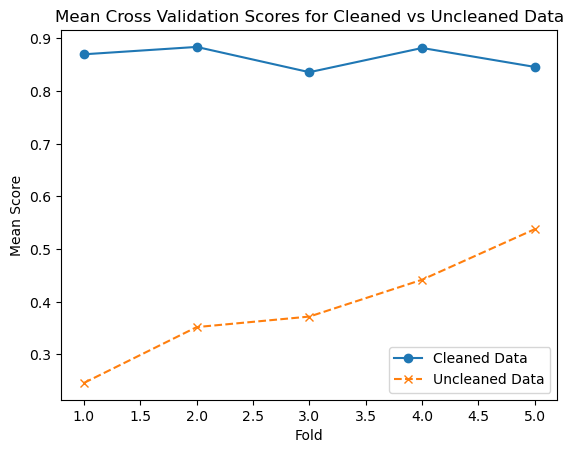

In [160]:
# Calculate mean scores for each fold
mean_cleaned = np.mean(cv_scores_cleaned, axis=0)
mean_uncleaned = np.mean(cv_scores_uncleaned, axis=0)

# Generate x-axis values for 5 folds
num_folds = 5
x = np.arange(1, num_folds + 1)

# Plotting mean scores
plt.plot(x, mean_cleaned, label='Cleaned Data', linestyle='-', marker='o')
plt.plot(x, mean_uncleaned, label='Uncleaned Data', linestyle='--', marker='x')

plt.xlabel('Fold')
plt.ylabel('Mean Score')
plt.title('Mean Cross Validation Scores for Cleaned vs Uncleaned Data')
plt.legend()
plt.show()

<h3 style="font-family: Verdana;line-height: 1.8;">Question 2: Insights and Features</h3>

***

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><b>2.1.</b> Identify three relevant "insights" related to the success or failure of Kickstarter campaigns. Provide a visualization 
for each insight.?</p>


<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;">Three (03) relevant insights identified related to the success or failure of Kickstarter campaigns are;<br>
- Main_Category<br>
- Goal<br>
- Backers<br><br>
Other valuable insights not mentioned include; <b>Pledged</b> which is highly correlated with number of Backers, <b>Country</b> and <b>Duration of campaigns</b> are other valuable insights. These aspects, among others, contribute significantly to the outcome of Kickstarter projects. For instance, the amount pledged not only reflects public interest but also affects the ultimate success or failure of a campaign. Similarly, the number of backers demonstrates community engagement, which is often crucial for a campaign's success. Understanding the success-to-failure ratio variations across Countries can help project creators make informed decisions regarding campaign strategies and target audiences based on geographic locations. Duration, on the other hand, might impact visibility and overall project engagement.<br><br>
Some of these insights will be further explained below, illustrating their effect on campaign success or failure.<br><br>
</p>

<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;"><b>Success Rates by Main Category</b><br></p>

<Figure size 1000x600 with 0 Axes>

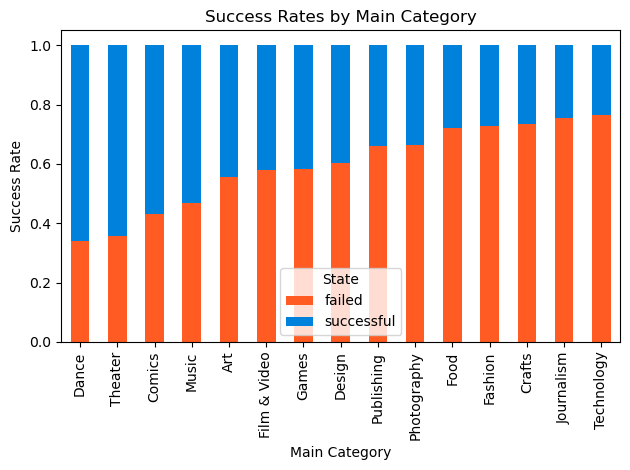

In [213]:
# Colors
colors = {'successful': '#0081DC', 'failed': '#FF5B22'}

# Success rates by main category
success_rates = data[data['state'].isin(['successful', 'failed'])].groupby('main_category')['state'].value_counts(normalize=True).unstack()
success_rates = success_rates.sort_values(by='successful', ascending=False)

plt.figure(figsize=(10, 6))
success_rates.plot(kind='bar', stacked=True, color=[colors.get(state, '#CCCCCC') for state in success_rates.columns])
plt.title('Success Rates by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Success Rate')
plt.legend(title='State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;"><br><br>
<b>Insight :</b> Some categories, such as Dance, Theater and Comics exhibit higher success rates compared to others like Technology, Journalism and Crafts<br><br>
<b>Conclusion :</b> Projects in categories like Dance, Theater and Comics have a higher likelihood of success on Kickstarter. Understanding these trends can guide project selection and strategy for higher success probabilities. Therefore considering Main Category and the more precise Category can be valuable insights in the task of predicting Kickstarter projects.</p>

***

<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;"><b>Funding Goals Vs. Pledged Amounts for Successful and Failed Projects</b><br></p>

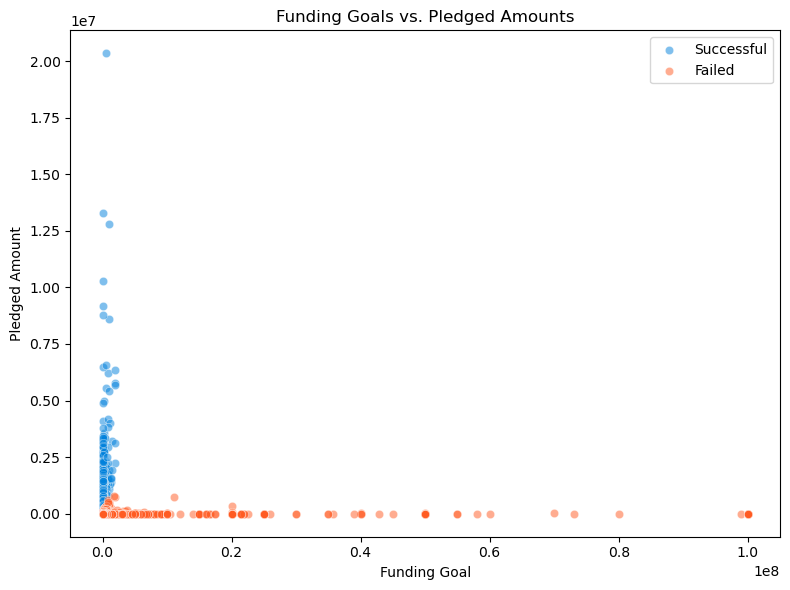

In [212]:
# Let's Filter successful and failed projects
successful_projects = data[data['state'] == 'successful']
failed_projects = data[data['state'] == 'failed']

# Plot funding goals vs. pledged amounts for successful and failed projects
plt.figure(figsize=(8, 6))
sns.scatterplot(data=successful_projects, x='goal', y='pledged', color='#0081DC' , label='Successful', alpha=0.5)
sns.scatterplot(data=failed_projects, x='goal', y='pledged', color='#FF5B22', label='Failed', alpha=0.5)
plt.title('Funding Goals vs. Pledged Amounts')
plt.xlabel('Funding Goal')
plt.ylabel('Pledged Amount')
plt.legend()
plt.tight_layout()
plt.show()

<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;"><br><br>In this scatter plot, each point represents a project. The x-axis denotes the funding goal set by the project, while the y-axis represents the actual amount pledged. The plot distinguishes successful (blue) and failed (orange) projects.<br><br>
<b>Insight :</b> Generally, successful projects tend to have lower funding goals compared to failed projects. While some successful projects surpass their goals, failed projects often fall short of their funding targets.<br><br>
<b>Conclusion :</b> Setting realistic funding goals appears crucial. Projects with overly ambitious funding targets might struggle to reach their goals and end up failing, whereas modest goals have a better chance of being met or exceeded.</p>

***

<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;"><b>Number of Backers and Campaign Outcome</b><br></p>

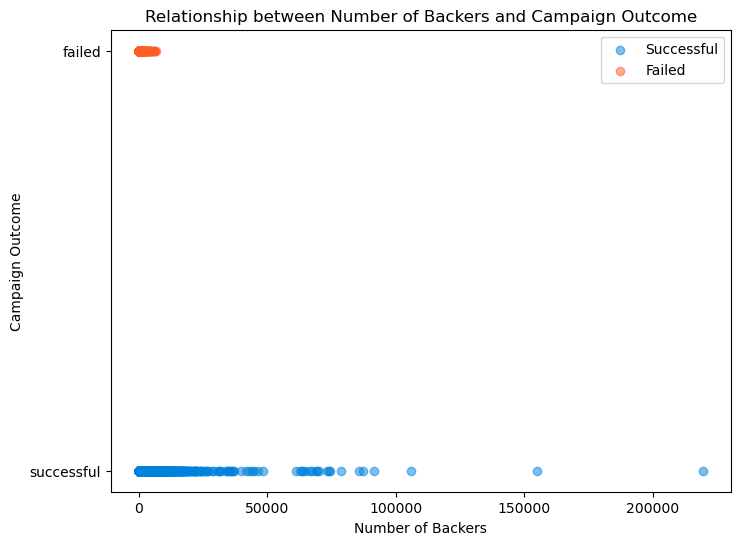

In [169]:
plt.figure(figsize=(8, 6))
plt.scatter(data[data['state'] == 'successful']['backers'], data[data['state'] == 'successful']['state'], label='Successful', alpha=0.5, color='#0081DC')
plt.scatter(data[data['state'] == 'failed']['backers'], data[data['state'] == 'failed']['state'], label='Failed', alpha=0.5, color='#FF5B22')
plt.xlabel('Number of Backers')
plt.ylabel('Campaign Outcome')
plt.legend()
plt.title('Relationship between Number of Backers and Campaign Outcome')
plt.show()

<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;">
    In this scatter plot, the x-axis represents the number of backers, while the y-axis indicates the campaign outcome. Each point on the plot represents a project, with successful campaigns shown in blue and failed ones in orange. 
    <br><br>
    <strong>Insight:</strong> There appears to be a discernible difference in the distribution of backers between successful and failed campaigns. Successful projects seem to have a more extensive range of backers compared to failed projects, which often have fewer backers overall.
    <br><br>
    <strong>Conclusion:</strong> The number of backers could play a crucial role in determining the success of a Kickstarter campaign. Projects with a larger number of backers might have a higher likelihood of success, while those with fewer backers may face challenges in meeting their goals.
</p>

***

<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;"><b>Success-to-Failure Ratio per Country ( Extra ) </b><br></p>

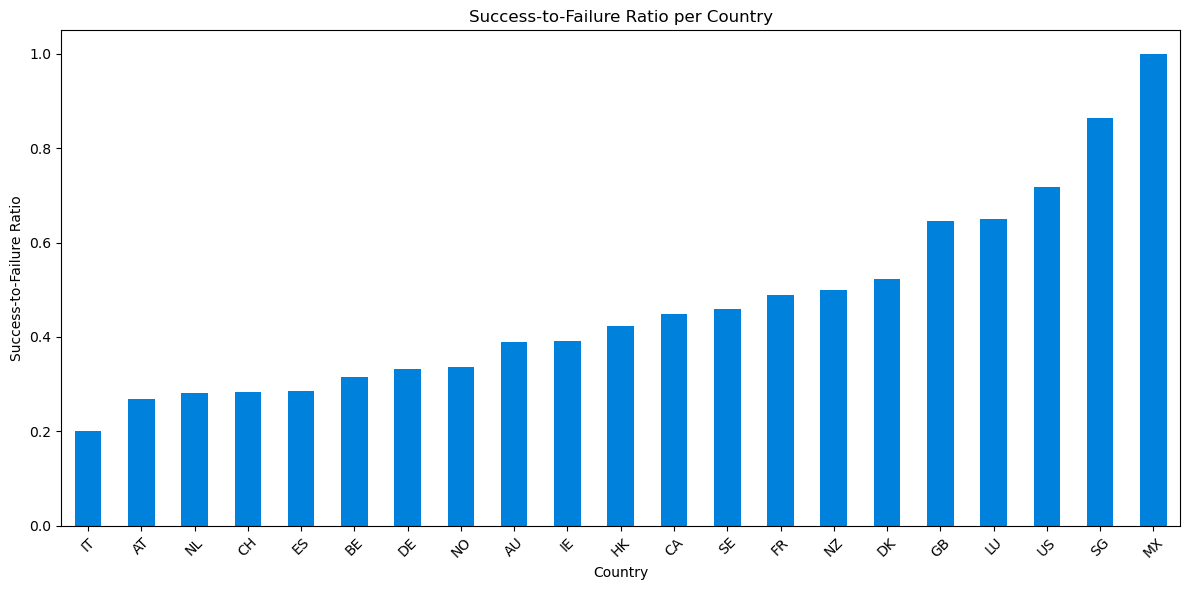

In [170]:
# Calculate ratio per country
success_failure_ratio_country = data.groupby(['country', 'state']).size().unstack().fillna(0)
success_failure_ratio_country['Success_Failure_Ratio'] = success_failure_ratio_country['successful'] / success_failure_ratio_country['failed']

# Plot success-to-failure ratio per country
plt.figure(figsize=(12, 6))
success_failure_ratio_country['Success_Failure_Ratio'].sort_values().plot(kind='bar',color='#0081DC')
plt.title('Success-to-Failure Ratio per Country')
plt.xlabel('Country')
plt.ylabel('Success-to-Failure Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;">
    <br><br>
    In this visualization, each bar represents a country and showcases the ratio of successful to failed Kickstarter projects within that country. The y-axis denotes the success-failure ratio, while each bar represents a different country.
    <br><br>
    <b>Insight :</b> The success-failure ratio varies significantly across different countries. Some countries exhibit a higher success rate, indicated by a higher ratio, whereas others showcase a relatively lower success rate.
    <br><br>
    <b>Conclusion :</b> The success-failure ratio per country provides insights into the varying success rates of Kickstarter projects globally. Understanding these variations can help project creators make informed decisions regarding campaign strategies and target audiences based on geographic locations.
    <br><br>
</p>

[View Other plots](#another_cell)

***

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><b>2.2.</b> Discuss the confounding variables that could affect the interpretation of these observations. How did you account 
for them in your analysis?</p>

<p style="font-family: Verdana; font-size: 14px; line-height: 1.8;">Confounding variables, in the context of Kickstarter campaigns, represent additional factors beyond the analyzed variables that could influence project success or failure. These variables include:<br><br>
- <b>Economic Factors:</b> Changes in the economy might affect backers disposable income and willingness to support projects.<br>
- <b>Platform Changes:</b> Alterations in Kickstarter's policies or features could impact project outcomes.<br>
- <b>Seasonal Trends:</b> Funding activity might vary based on seasons, holidays, or specific times of the year.<br>
- <b>Project Timing:</b> The moment a project is launched or its duration could be influential, affected by current events or trends.<br><br>
In my analysis, I addressed potential confounding variables by segmenting data based on time and platform-related changes. This segmentation allowed me to investigate the influence of economic shifts, seasonal trends, and policy updates on campaign success rates within specific time frames. Additionally, when examining success rates across different countries, I factored in regional economic conditions and Kickstarter policies to isolate their impact on campaign outcomes. While complete elimination of confounding effects is challenging, this approach helped in understanding and mitigating their potential influence on the observed results.</p>

***

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><b>2.3.</b> How could these "insights" be transformed into variables to facilitate the learning of an ML model?</p>

<p style="font-family: Verdana; line-height: 1.8; font-size: 14px;">In the process of preparing features ( Insights ) for the machine learning model:</p>

<ul style="font-family: Verdana; line-height: 1.8; font-size: 14px;">
    <li><b>Numerical Features (Backers, Pledged, Duration, Goal):</b> These were retained in their original format, containing continuous numerical values.</li>
    <li><b>Categorical Features:</b> Specific encoding methods were applied to transform these features into a suitable format for the model:
        <ul>
            <li><b>Main_Category:</b> Employed one-hot encoding to represent 15 unique categories</li>
            <li><b>Country:</b> Transformed using one-hot encoding to capture 21 unique countries</li>
            <li><b>Currency:</b> Also utilized one-hot encoding to represent 13 unique currencies</li>
        </ul>
    </li>
</ul>
<p style="font-family: Verdana; line-height: 1.8; font-size: 14px;">These encoding techniques were selected considering the unique counts and nature of the categorical variables, ensuring their representation for effective comprehension by the model during the training phase.</p>

[View Feature Engineering Section](#features)

<h3 style="font-family: Verdana;line-height: 1.8;">Question 3: ML Model and Business Impact</h3>

***

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><b>3.1.</b> Propose an ML approach to predict the success of Kickstarter campaigns using the provided data. Explain the 
types of models, hyperparameters, and cross-validation you would use.</p>

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Proposed ML Approach for Predicting Kickstarter Campaign Success</p>

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;"><b>Approach Overview:</b><br>
To predict the success of Kickstarter campaigns, I propose a supervised learning approach. Leveraging a diverse dataset encompassing features like goal, backers, duration, main category, country, and currency, the objective is to determine campaign outcomes. I've formulated a strategy employing three distinct models: Random Forest, XGBoost, and a Neural Network.</p>

[View the Training Section](#training)

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;"><b>Data Preprocessing:</b><br>
I've preprocessed the dataset and encoded categorical features:
<ul style="list-style-type: disc;">
  <li style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><code style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Main_category</code>, <code style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Country</code>, and <code style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Currency</code> were one-hot encoded, featuring 15, 21, and 13 unique categories, respectively.</li>
</ul></p>

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;"><b>Model Selection:</b><br>
<ul style="list-style-type:disc;font-family: Verdana;line-height: 1.8; font-size: 14px;">
  <li><b>Random Forest:</b> Initially employed with 300 estimators and a random state of 42.</li>
  <li><b>XGBoost:</b> Utilized as an ensemble model with default parameters.</li>
  <li><b>Neural Network:</b> Configured as a Sequential model comprising two hidden layers of 64 and 32 neurons, utilizing ReLU activation, and a final sigmoid layer for binary classification.</li>
</ul></p>

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;"><b>Cross-Validation and Hyperparameter Tuning:</b><br>
The strategy encompasses a robust 5-fold cross-validation methodology to assess model performance comprehensively across diverse subsets of the training data. Furthermore, I've implemented GridSearchCV to explore various hyperparameters for each model, enhancing their predictive prowess.</p>

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;"><b>Model Evaluation:</b><br>
The models underwent evaluation on a holdout test set, employing metrics such as precision, recall, and F1-score.</p>

<p style="font-family: Verdana;line-height: 1.6; font-size: 14px;"><b>Selection of Best Model:</b><br>
I conducted a meticulous selection process, leveraging cross-validation accuracy, and subsequent hyperparameter optimization to arrive at the best-performing model.</p>

***

***

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><b>3.2.</b> How do you interpret the results produced by your ML solution in terms of campaign success? How does this 
solution add value for project promoters on Kickstarter?</p>

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;">
    The model's predictions serve as estimations of a campaign's success based on provided features like category, main_category, goal, backers, country, currency and duration. Higher predicted probabilities indicate a greater likelihood of campaign success, while lower probabilities suggest reduced chances. 
</p>

***

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><b>3.3.</b> How do you envision stakeholders using your solution to understand how to launch high-success rate campaigns? 
Provide examples of its use in a business context.</p>

<h3 style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Interpreting Predictive Insights for Strategic Decision-Making</h3>
<ul style="font-family: Verdana;line-height: 1.8; font-size: 14px;">
    <li><b>Predictive Estimates:</b> Stakeholders utilize the model's output, which provides probabilities or scores indicating the anticipated success likelihood of a Kickstarter campaign based on specified parameters.</li>
    <li><b>Informing Decision-Making:</b> Interpretation of these predictive insights empowers stakeholders to gauge potential success rates and make strategic decisions accordingly, considering adjustments to campaign parameters or resource allocation.</li>
    <li><b>Strategic Adjustments:</b> Stakeholders, upon analyzing the predictive estimates, strategically modify campaign details, such as funding goals, duration, or target audience, based on their interpretation of the model's output.</li>
</ul>

<h3 style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Business Context Example:</h3>

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Consider a scenario: <i>a content creator group aims to crowdfund a unique stage production titled "Single Vaelle - Le Jar."</i>. Seeking guidance, they input campaign details into the predictive model: the funding goal, expected campaign duration, targeting theater enthusiasts, and specific categorical information related to their campaign, including country and currency.</p>

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;">The model predicts a higher likelihood of success for campaigns similar to "Single Vaelle - Le Jar" that target audiences interested in short films within the "Film & Video" category. It subtly suggests adjusting the funding goal within a specific range that aligns with the expected audience's interest. Empowered by the model's insights, stakeholders strategically interpret the guidance. They focus their promotional efforts on platforms frequented by short film enthusiasts, leveraging the campaign's unique aspects to captivate the audience. Moreover, the model's estimation subtly recommends optimizing the funding goal within a specified range to attract more backers interested in supporting creative short film projects. This strategic adjustment aligns with the predicted success factors derived from similar campaigns.</p>
    
<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;">The decisions informed by the model's predictive insights resonate effectively with the audience interested in short films. By tailoring their campaign strategy based on these insights, the production garners considerable interest and exceeds its funding goal.</p>
    
<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Ultimately, the campaign's success attributes a portion of its achievement to the strategic optimization guided by the predictive estimates from the model. The model's insights empower stakeholders to make informed decisions, significantly enhancing the campaign's success within the "Film & Video" category. The model's predictive insights aid stakeholders in understanding potential success rates, empowering them to make informed decisions that enhance the campaign's chances of success within the theater category.</p>

***

[View Coded Example](#example)

<h3 style="font-family: Verdana;line-height: 1.8;">Question 4: Model Maintenance</h3>

***

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;"><b>4.1.</b>  Let's imagine that your solution is deployed and running in production. You notice that the model's performance has 
been gradually declining in recent months. Additionally, you identify certain variables whose values seem to have changed during the same period. In your opinion, what could be a reason for this situation, and how would you resolve it ?</p>

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Potential Reasons for Declining Performance:</p>
<ol style="font-family: Verdana;line-height: 1.8; font-size: 14px;">
    <li><b>Concept Drift:</b> Over time, the relationship between input variables and the target output may change, impacting model accuracy.</li>
    <li><b>Data Quality Issues:</b> Sudden changes or inconsistencies in data quality can affect model performance.</li>
    <li><b>Model Decay:</b> Evolving trends or changes in user behavior might lead to outdated predictions.</li>
    <li><b>Feature Importance Shift:</b> Changes in the relevance or significance of certain features can influence predictive ability.</li>
</ol>

<h3 style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Steps to Resolve:</h3>
<ol style="font-family: Verdana;line-height: 1.8; font-size: 14px;">
    <li><b>Data Analysis and Validation:</b> Identify inconsistencies or missing values in recent data, ensuring data integrity.</li>
    <li><b>Feature Engineering:</b> Reassess feature importance and consider modifying or adding new variables.</li>
    <li><b>Model Retraining:</b> Retrain the model using the most recent data to adapt to changing patterns.</li>
    <li><b>Regular Monitoring:</b> Implement continuous monitoring of model performance and periodic re-evaluation.</li>
</ol>

<h3 style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Action Plan:</h3>
<ul style="font-family: Verdana;line-height: 1.8; font-size: 14px;">
    <li><b>Investigate Variables:</b> Identify specific variables that significantly changed and assess their impact on the target variable.</li>
    <li><b>Data Collection:</b> Gather more recent data and augment the dataset to include current information.</li>
    <li><b>Model Evaluation:</b> Conduct thorough evaluations, including cross-validation, before deploying the updated model.</li>
</ul>

<h3 style="font-family: Verdana;line-height: 1.8; font-size: 14px;">Continuous Improvement:</h3>
<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;">A robust monitoring system that regularly re-evaluates the model's performance, detects any deviations, and triggers interventions like retraining or recalibration when necessary.</p>

<p style="font-family: Verdana;line-height: 1.8; font-size: 14px;">By Consistently analyzing the model's performance in conjunction with changes in the input variables, We can adapt the model to evolving data patterns and maintain its accuracy over time.</p>